In [1]:
# useful links:
# https://www.geeksforgeeks.org/pandas-filling-nan-in-categorical-data/
# https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205
# https://journalofbigdata.springeropen.com/articles/10.1186/s40537-020-00349-y
# https://towardsdatascience.com/machine-learning-multiclass-classification-with-imbalanced-data-set-29f6a177c1a
# https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc
# https://www.kaggle.com/artgor/is-this-malware-eda-fe-and-lgb-updated#Feature-engineering-and-transformation
# https://www.kaggle.com/bogorodvo/lightgbm-baseline-model-using-sparse-matrix?fbclid=IwAR3FXstKfjdOnRy333IcAutKHHcsJTZ7bnKVTpAoYNRNv4qdCoHSIys6YUg
# https://medium.com/@hiromi_suenaga/machine-learning-1-lesson-5-df45f0c99618
# https://medium.com/@hiromi_suenaga/machine-learning-1-lesson-4-a536f333b20d
# https://colab.research.google.com/github/mohammedterry/ANNs/blob/master/MultiClass.ipynb
# Some models that have capability to handle missing value by default are:
# XGBoost: https://xgboost.readthedocs.io/en/latest/faq.html
# LightGBM: https://lightgbm.readthedocs.io/en/latest/Advanced-Topics.html
# Catboost: https://catboost.ai/docs/concepts/algorithm-missing-values-processing.html
# Some references on how to deal with missing value:
# Missing Values by Alexis Cook
# Data Cleaning Challenge: Handling missing values by Rachael Tatman
# A Guide to Handling Missing values in Python by Parul Pandey
# learn about stratified k fold
# https://github.com/reddyprasade/Machine-Learning-with-Scikit-Learn-Python-3.x
# https://github.com/interviewBubble/Data-Science-Competitions
# https://github.com/DataCanvasIO/HyperGBM : AutoML library
# https://www.machinelearningplus.com/machine-learning/feature-selection/


# Importing Libraries

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
# for excel file install package xlrd, openpyxl   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
pd.set_option('display.max_colwidth', None)


# Data Reading

In [3]:
df_data_dict = pd.read_excel("data_dictionary.xlsx", sheet_name='Sheet1', engine='openpyxl',  skiprows=1)

In [4]:
df_data_desc_train_test = df_data_dict.iloc[:30, :]
df_data_desc_train_test

,Feature Name,Description
0,primary_identifier,Unique subscriber Identifier
1,device_type,Device technology 4G/3G/2G
2,device_category,Device category smartphone/feature phone etc…
3,age_group,age group of subscriber
4,district_name,home location district
5,network_stay,number of months the subscriber has been with the service provider
6,average_monthly_bill_amount,last 6 month average bill amount in rupees
7,dusage_sum,total data usage in MB (last 30 days)
8,dusage_min,minimum daily data usage in MB (last 30 days)
9,dusage_max,maximum daily data usage in MB (last 30 days)


In [5]:
df_data_desc_mobile_plans = df_data_dict.iloc[32:, :]
df_data_desc_mobile_plans

,Feature Name,Description
32,plan_name,"unique identifier for mobile plan (PKG1, PKG2, …, PKG8)"
33,data_quota,free data quota included in plan (GB)
34,voice_onnet_quota,free voice quota for within network calls (mins)
35,voice_offnet_quota,free voice quota for outside the network calls (mins)
36,text_onnet_quota,free sms quota for within network text messages (num of messages)
37,text_offnet_quota,free sms quota for outside the network text messages (num of messages)
38,plan_value,monthly rental value of plan (Rs.)
39,plan_number,"Integer identifier for rental plan (1, 2, …, 8). Required for submission file"


In [9]:
df_mobile_plans = pd.read_csv("mobile_plans.csv",low_memory = False)
df_mobile_plans_fl = df_mobile_plans[['plan_name','plan_number']]
df_mobile_plans

,plan_name,data_quota,voice_onnet_quota,voice_offnet_quota,text_onnet_quota,text_offnet_quota,plan_value,plan_number
0,PKG1,3,900,0,900,0,400,1
1,PKG2,6,900,0,900,0,620,2
2,PKG3,8,unlimited,0,unlimited,0,950,3
3,PKG4,12,unlimited,0,unlimited,0,1300,4
4,PKG5,12,unlimited,450,unlimited,0,1550,5
5,PKG6,20,unlimited,450,unlimited,0,1900,6
6,PKG7,40,unlimited,450,unlimited,0,2550,7
7,PKG8,50,unlimited,900,unlimited,0,3200,8


In [7]:
df_sample_submission = pd.read_csv("sample_submission.csv",low_memory = False)
df_sample_submission.head()

,primary_identifier,next_month_plan
0,2003793,3
1,1776101,2
2,6945050,4
3,2472049,8
4,7197266,1


In [8]:
df_test = pd.read_csv("test_dataset.csv",low_memory = False)
df_test.head()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count
0,2003793,4G,Smartphone,MALE,Colombo,40-50,4,689.42,148.0,0.000000,148.146634,37.037382,4.0,38.251243,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,1.0,NaN,NaN
1,1776101,4G,Smartphone,MALE,Colombo,40-50,7,799.93,300.0,0.180222,119.466825,10.027957,30.0,24.125172,0.0,0.0,0.0,0.0,NaN,0.0,107.0,16.266667,0.0,21.0,5.107143,4.924111,0.0,0.0,NaN,NaN
2,6945050,2G,Basic,MALE,Colombo,20-30,20,1538.45,8215.0,0.000000,4048.511104,2053.950266,4.0,932.358667,0.0,0.0,0.0,0.0,NaN,0.0,108.0,90.000000,0.0,8.0,13.558333,16.397071,0.0,0.0,110.0,2.0
3,2472049,4G,Smartphone,FEMALE,Matara,40-50,10,995.75,11613.0,0.000000,1057.448432,430.118721,27.0,268.457304,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.416667,0.0,2.0,0.333333,0.087355,0.0,0.0,NaN,NaN
4,7197266,4G,Smartphone,MALE,Kandy,30-40,154,553.61,26505.0,28.515345,2490.832742,883.505624,30.0,660.353290,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,350.0,1.0


In [9]:
df_test.shape

(4500, 30)

In [10]:
# observing missing value counts
df_test.isnull().sum()

primary_identifier                0
device_type                      13
device_category                  16
gender                           55
district_name                     0
age_group                        55
network_stay                      0
average_monthly_bill_amount       0
dusage_sum                        0
dusage_min                        0
dusage_max                        0
dusage_avg                      364
dusage_days                       0
dusage_stddev                     0
vusage_onnet_sum                  0
vusage_onnet_max                  0
vusage_onnet_min                  0
vusage_onnet_days                 0
vusage_onnet_avg               3715
vusage_onnet_stddev               0
vusage_offnet_sum                 0
vusage_offnet_max                 0
vusage_offnet_min                 0
vusage_offnet_days                0
vusage_offnet_avg              1426
vusage_offnet_stddev              0
number_of_fixed_bb_accounts       0
number_of_iptv_accounts     

In [3]:
df_train = pd.read_csv("train_dataset.csv",low_memory = False)
df_train.head(10)

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan
0,6875768,4G,Smartphone,MALE,Kegalle,40-50,219,761.62,6317.0,2.773958,622.685848,210.579939,30.0,197.116822,0.0,0.000000,0.0,0.0,NaN,0.000000,677.0,152.866667,0.0,27.0,25.099383,34.759221,0.0,1.0,NaN,NaN,PKG2
1,6406277,4G,Smartphone,MALE,Galle,40-50,36,2482.52,28365.0,3.079438,2569.429138,945.531235,30.0,573.299639,0.0,0.000000,0.0,0.0,NaN,0.000000,76.0,35.433333,0.0,15.0,5.071111,6.779644,0.0,0.0,600.0,2.0,PKG1
2,3563570,4G,Smartphone,MALE,Kandy,30-40,186,1565.55,18581.0,48.193713,2739.515326,619.378810,30.0,619.750500,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,0.0,1.0,PKG6
3,1853666,4G,Smartphone,FEMALE,Colombo,40-50,24,2397.49,91071.0,22.437842,7523.355693,3035.708609,30.0,2174.203127,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,1110.0,2.0,PKG4
4,2794331,4G,Smartphone,FEMALE,Kandy,50-60,37,2501.75,19736.0,53.302092,1239.220170,657.889802,30.0,329.152516,0.0,0.000000,0.0,0.0,NaN,0.000000,258.0,87.616667,0.0,23.0,11.256522,16.224071,0.0,1.0,1350.0,2.0,PKG4
5,3619017,2G,Basic,MALE,Galle,40-50,30,495.54,0.0,0.001531,0.173772,0.020356,30.0,0.034965,0.0,0.000000,0.0,0.0,NaN,0.000000,2.0,1.066667,0.0,3.0,0.700000,0.233432,0.0,0.0,NaN,NaN,PKG1
6,7633257,4G,Smartphone,MALE,Kegalle,30-40,35,1977.19,14782.0,205.394300,1001.028832,492.737055,30.0,177.211955,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,110.0,1.0,PKG5
7,5507217,4G,Smartphone,MALE,Gampaha,30-40,170,2925.00,3473.0,6.426329,1132.109515,115.785698,30.0,222.353815,43.0,9.966667,0.0,7.0,6.147619,2.939495,0.0,0.000000,0.0,0.0,NaN,0.000000,0.0,0.0,650.0,1.0,PKG5
8,7566055,4G,Smartphone,MALE,Kalutara,20-30,48,473.59,3870.0,0.000000,1180.032728,552.976737,7.0,337.334503,7.0,6.700000,0.0,2.0,3.575000,1.313412,34.0,22.883333,0.0,3.0,11.338889,4.661264,0.0,0.0,110.0,1.0,PKG2
9,7324903,4G,Smartphone,MALE,Colombo,20-30,81,1324.60,20876.0,3.450117,1290.141176,695.869196,30.0,334.779967,7.0,7.400000,0.0,1.0,7.400000,1.351049,11.0,6.816667,0.0,6.0,1.922222,1.310881,0.0,0.0,360.0,2.0,PKG2


In [14]:
df_temp = df_train[['average_monthly_bill_amount','dusage_sum','vusage_onnet_sum','vusage_offnet_sum','add_on_tot_rental','next_month_plan']].\
sort_values(by='average_monthly_bill_amount',ascending=False)
df_joined = df_temp.merge(df_mobile_plans, left_on='next_month_plan', right_on='plan_name',how='inner')
df_joined.drop(['plan_name','text_offnet_quota','plan_number'], axis=1, inplace=True)
df_joined.head(20)

,average_monthly_bill_amount,dusage_sum,vusage_onnet_sum,vusage_offnet_sum,add_on_tot_rental,next_month_plan,data_quota,voice_onnet_quota,voice_offnet_quota,text_onnet_quota,plan_value
0,19007.89,69356.0,0.0,0.0,0.0,PKG8,50,unlimited,900,unlimited,3200
1,14576.60,0.0,0.0,0.0,1000.0,PKG8,50,unlimited,900,unlimited,3200
2,12073.57,32292.0,12.0,0.0,900.0,PKG8,50,unlimited,900,unlimited,3200
3,11815.66,140556.0,0.0,0.0,4600.0,PKG8,50,unlimited,900,unlimited,3200
4,10604.58,1812.0,0.0,0.0,1200.0,PKG8,50,unlimited,900,unlimited,3200
5,10420.77,17615.0,1574.0,1366.0,0.0,PKG8,50,unlimited,900,unlimited,3200
6,10019.49,73.0,0.0,0.0,350.0,PKG8,50,unlimited,900,unlimited,3200
7,9987.46,2455.0,61.0,939.0,600.0,PKG8,50,unlimited,900,unlimited,3200
8,9501.54,24199.0,13.0,0.0,0.0,PKG8,50,unlimited,900,unlimited,3200
9,9088.94,93790.0,224.0,120.0,NaN,PKG8,50,unlimited,900,unlimited,3200


In [63]:
df_train['dusage_days'].unique()

array([30.,  7.,  4.,  0., 26., 27., 28., 29., 15.,  1., 12., 19., 23.,
       10., 14., 18.,  9., 24., 25.,  2., 16.,  5.,  3., 22., 13.,  6.,
       17., 21.,  8., 20., 11.])

In [69]:
df_train[['dusage_sum','dusage_avg','next_month_plan']].sort_values(by='dusage_sum',ascending=False).head(30)

,dusage_sum,dusage_avg,next_month_plan
8826,176410.0,5880.338189,PKG8
6457,158666.0,5288.897491,PKG6
590,158501.0,5283.371903,PKG7
4535,148515.0,4950.522718,PKG6
5961,147705.0,4923.512974,PKG2
1105,146889.0,4896.302018,PKG3
3643,144045.0,4801.523742,PKG6
10480,142233.0,4741.126576,PKG2
6995,140556.0,4685.226179,PKG8
4232,140335.0,7386.100749,PKG8


In [12]:
df_train.shape

(10500, 31)

In [26]:
# # var datatypes
# df_train.dtypes

In [14]:
# observing missing value counts
df_train.isnull().sum()

primary_identifier                0
device_type                      23
device_category                  30
gender                          135
district_name                     0
age_group                       135
network_stay                      0
average_monthly_bill_amount       0
dusage_sum                        0
dusage_min                        0
dusage_max                        0
dusage_avg                      858
dusage_days                       0
dusage_stddev                     0
vusage_onnet_sum                  0
vusage_onnet_max                  0
vusage_onnet_min                  0
vusage_onnet_days                 0
vusage_onnet_avg               8672
vusage_onnet_stddev               0
vusage_offnet_sum                 0
vusage_offnet_max                 0
vusage_offnet_min                 0
vusage_offnet_days                0
vusage_offnet_avg              3313
vusage_offnet_stddev              0
number_of_fixed_bb_accounts       0
number_of_iptv_accounts     

# Visualizing Categorical Features 

In [15]:
df_train['device_type'].unique()

array(['4G', '2G', '3G', nan], dtype=object)

In [16]:
df_train['device_category'].unique()

array(['Smartphone', 'Basic', 'Feature phone', 'Pluggable card', 'Tablet',
       nan, 'Modem'], dtype=object)

In [17]:
df_train['gender'].unique()

array(['MALE', 'FEMALE', nan], dtype=object)

In [18]:
df_train['district_name'].unique()

array(['Kegalle', 'Galle', 'Kandy', 'Colombo', 'Gampaha', 'Kalutara',
       'Kurunegala', 'Puttalam', 'Jaffna', 'Ampara', 'Matara', 'Matale',
       'Anuradhapura', 'Ratnapura', 'Nuwara Eliya', 'Badulla', 'Unknown',
       'Mannar', 'Monaragala', 'Trincomalee', 'Batticaloa', 'Hambantota',
       'Polonnaruwa', 'Vavuniya', 'Kilinochchi', 'Mullaitivu'],
      dtype=object)

In [19]:
df_train['age_group'].unique()

array(['40-50', '30-40', '50-60', '20-30', '>70', nan, '60-70', '<20'],
      dtype=object)

In [20]:
df_train['next_month_plan'].unique()

array(['PKG2', 'PKG1', 'PKG6', 'PKG4', 'PKG5', 'PKG3', 'PKG8', 'PKG7'],
      dtype=object)

# Transforming categorical values to numerical 

In [21]:
# transforming next_month_plan cat var to numerical 
df_train_new = df_train.merge(df_mobile_plans_fl, left_on='next_month_plan', right_on='plan_name', how = 'outer')
df_train_new.drop(['plan_name','next_month_plan'],inplace=True, axis=1)
df_train_new.rename(columns={'plan_number':"next_month_plan"},inplace=True)
df_train_new.head()

,primary_identifier,device_type,device_category,gender,district_name,age_group,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count,next_month_plan
0,6875768,4G,Smartphone,MALE,Kegalle,40-50,219,761.62,6317.0,2.773958,622.685848,210.579939,30.0,197.116822,0.0,0.0,0.0,0.0,NaN,0.000000,677.0,152.866667,0.0,27.0,25.099383,34.759221,0.0,1.0,NaN,NaN,2
1,7566055,4G,Smartphone,MALE,Kalutara,20-30,48,473.59,3870.0,0.000000,1180.032728,552.976737,7.0,337.334503,7.0,6.7,0.0,2.0,3.575,1.313412,34.0,22.883333,0.0,3.0,11.338889,4.661264,0.0,0.0,110.0,1.0,2
2,7324903,4G,Smartphone,MALE,Colombo,20-30,81,1324.60,20876.0,3.450117,1290.141176,695.869196,30.0,334.779967,7.0,7.4,0.0,1.0,7.400,1.351049,11.0,6.816667,0.0,6.0,1.922222,1.310881,0.0,0.0,360.0,2.0,2
3,5038603,4G,Smartphone,FEMALE,Colombo,30-40,52,352.97,1862.0,2.095556,356.642125,62.089134,30.0,92.779127,0.0,0.0,0.0,0.0,NaN,0.000000,7.0,2.816667,0.0,6.0,1.236111,0.657627,0.0,0.0,NaN,NaN,2
4,8683145,4G,Smartphone,MALE,Galle,40-50,126,1165.14,325.0,0.000000,70.372355,12.037511,27.0,17.202423,0.0,0.0,0.0,0.0,NaN,0.000000,59.0,11.700000,0.0,15.0,3.936667,3.213490,0.0,1.0,NaN,NaN,2


In [22]:
# from sklearn.preprocessing import LabelEncoder 
# labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
# data['C'] = labelencoder.fit_transform(data['C']) #fitting and transforming the desired categorical column.

## points to be discussed
1. when cat var == nan , should it be considered as a class ?
2. train models without any nan values
3. train models with nan values replaced by proper values
4. create a list or dictionary of all algorithms that will be used and use that to fit model and serially print their accuracies

# EDA on Training Data

In [23]:
#checking class imbalance 
df_class_instance = df_train_new.groupby(by=['next_month_plan'])['primary_identifier'].count().sort_values(ascending=False).reset_index()
df_class_instance.rename(columns={"primary_identifier":"user_count"},inplace=True)
df_class_instance

,next_month_plan,user_count
0,1,3673
1,3,1717
2,5,1558
3,2,1354
4,6,740
5,4,735
6,7,364
7,8,359


In [24]:
# describing data
df_train.describe()

,primary_identifier,network_stay,average_monthly_bill_amount,dusage_sum,dusage_min,dusage_max,dusage_avg,dusage_days,dusage_stddev,vusage_onnet_sum,vusage_onnet_max,vusage_onnet_min,vusage_onnet_days,vusage_onnet_avg,vusage_onnet_stddev,vusage_offnet_sum,vusage_offnet_max,vusage_offnet_min,vusage_offnet_days,vusage_offnet_avg,vusage_offnet_stddev,number_of_fixed_bb_accounts,number_of_iptv_accounts,add_on_tot_rental,add_on_count
count,1.050000e+04,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,9642.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.0,10500.000000,1828.000000,10500.000000,10500.000000,10500.000000,10500.000000,10500.000000,7187.000000,10500.000000,10500.000000,10500.000000,6667.000000,6667.000000
mean,5.531286e+06,91.984381,2083.923835,12813.022667,72.723046,1440.667844,492.631079,24.791524,330.034959,22.845524,6.044802,0.0,0.762095,18.225919,1.488175,67.660857,14.700308,0.024573,8.970667,6.559910,3.493543,0.052857,0.246762,518.560072,1.889156
std,2.597973e+06,71.888784,1470.550224,15873.353992,168.971572,1846.417470,552.332657,9.677004,403.594192,121.657675,23.327802,0.0,2.734213,22.107320,6.045622,130.195398,22.039382,0.360990,9.454676,7.527537,5.231989,0.236587,0.500846,622.863583,1.224138
min,1.000454e+06,3.000000,-11446.340000,0.000000,0.000000,0.000000,0.000042,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,0.000000,0.016667,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.286428e+06,22.000000,1036.270000,1939.000000,0.000000,367.013343,123.664867,25.000000,89.722583,0.000000,0.000000,0.0,0.000000,3.479167,0.000000,0.000000,0.000000,0.000000,0.000000,2.397829,0.000000,0.000000,0.000000,200.000000,1.000000
50%,5.538684e+06,82.000000,1783.845000,7800.500000,2.385201,977.321670,328.181079,30.000000,232.348678,0.000000,0.000000,0.0,0.000000,9.277778,0.000000,17.000000,6.858333,0.000000,6.000000,4.419298,1.614136,0.000000,0.000000,360.000000,2.000000
75%,7.799776e+06,149.000000,2700.592500,17836.000000,64.012977,1840.254781,665.463278,30.000000,424.423794,0.000000,0.000000,0.0,0.000000,26.961806,0.000000,85.000000,21.087500,0.000000,16.000000,7.851111,5.016638,0.000000,0.000000,650.000000,2.000000
max,9.999195e+06,314.000000,19007.890000,176410.000000,3501.540916,30513.071629,7386.100749,30.000000,6913.568069,3009.000000,423.283333,0.0,29.000000,221.766667,122.293736,2642.000000,477.300000,25.566667,30.000000,107.998148,90.944793,3.000000,3.000000,19450.000000,24.000000


In [70]:
df_train[['add_on_tot_rental','add_on_count']].describe()

,add_on_tot_rental,add_on_count
count,6667.000000,6667.000000
mean,518.560072,1.889156
std,622.863583,1.224138
min,0.000000,1.000000
25%,200.000000,1.000000
50%,360.000000,2.000000
75%,650.000000,2.000000
max,19450.000000,24.000000


In [78]:
# checking if add_on_tot_rental and add_on_count have any relation with the below features
df_train[['average_monthly_bill_amount','number_of_fixed_bb_accounts','next_month_plan','add_on_tot_rental','add_on_count']]\
.sort_values(by='add_on_tot_rental',ascending=False).head(20)

,average_monthly_bill_amount,number_of_fixed_bb_accounts,next_month_plan,add_on_tot_rental,add_on_count
5235,16401.97,0.0,PKG2,19450.0,1.0
9628,14749.53,0.0,PKG4,6560.0,3.0
7661,4125.43,0.0,PKG8,6450.0,1.0
3756,7214.83,0.0,PKG8,6450.0,1.0
6910,8490.30,0.0,PKG8,6050.0,4.0
1160,1643.63,0.0,PKG4,6000.0,5.0
3643,7787.31,0.0,PKG6,5940.0,2.0
4630,5512.92,0.0,PKG7,5940.0,2.0
6597,671.01,0.0,PKG2,5780.0,5.0
8882,3587.37,0.0,PKG5,5690.0,10.0


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   primary_identifier           10500 non-null  int64  
 1   device_type                  10477 non-null  object 
 2   device_category              10470 non-null  object 
 3   gender                       10365 non-null  object 
 4   district_name                10500 non-null  object 
 5   age_group                    10365 non-null  object 
 6   network_stay                 10500 non-null  int64  
 7   average_monthly_bill_amount  10500 non-null  float64
 8   dusage_sum                   10500 non-null  float64
 9   dusage_min                   10500 non-null  float64
 10  dusage_max                   10500 non-null  float64
 11  dusage_avg                   9642 non-null   float64
 12  dusage_days                  10500 non-null  float64
 13  dusage_stddev   

In [27]:
#checking duplicates 
df_train_new.duplicated().sum()

0

In [29]:
# checking std of features 
df_train.var()

primary_identifier             6.749461e+12
network_stay                   5.167997e+03
average_monthly_bill_amount    2.162518e+06
dusage_sum                     2.519634e+08
dusage_min                     2.855139e+04
dusage_max                     3.409257e+06
dusage_avg                     3.050714e+05
dusage_days                    9.364441e+01
dusage_stddev                  1.628883e+05
vusage_onnet_sum               1.480059e+04
vusage_onnet_max               5.441864e+02
vusage_onnet_min               0.000000e+00
vusage_onnet_days              7.475923e+00
vusage_onnet_avg               4.887336e+02
vusage_onnet_stddev            3.654954e+01
vusage_offnet_sum              1.695084e+04
vusage_offnet_max              4.857344e+02
vusage_offnet_min              1.303137e-01
vusage_offnet_days             8.939089e+01
vusage_offnet_avg              5.666381e+01
vusage_offnet_stddev           2.737371e+01
number_of_fixed_bb_accounts    5.597336e-02
number_of_iptv_accounts        2

In [82]:
# sns.FacetGrid(df_train_new,height=5,).map(sns.histplot,"network_stay").add_legend();

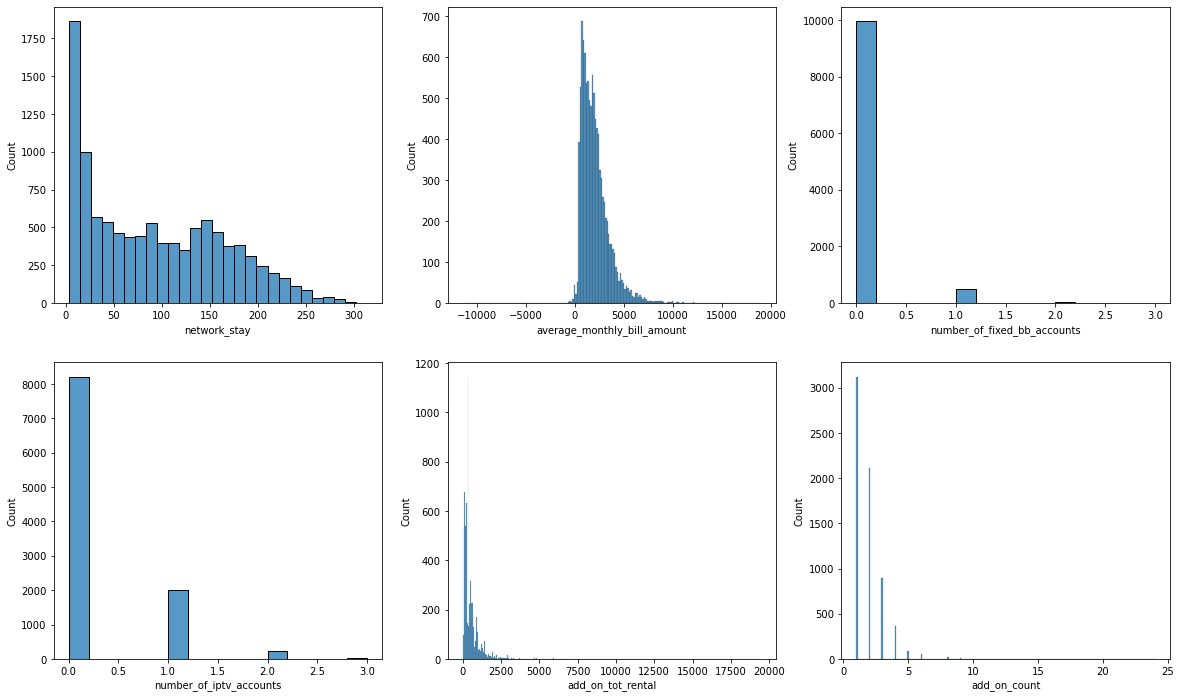

In [84]:
#distribution plot
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Use the axes for plotting
sns.histplot(df_train_new['network_stay'], ax=axes[0,0]);
# axes[0,0].set_xlabel('Year')
# axes[0,0].set_ylabel('Yield (tons per hectare)')
# axes[0,0].legend(['Apples', 'Oranges']);
# axes[0,0].set_title('Crop Yields in Kanto')

# Pass the axes into seaborn
sns.histplot(df_train_new['average_monthly_bill_amount'], ax=axes[0,1]);

# Use the axes for plotting
sns.histplot(df_train_new['number_of_fixed_bb_accounts'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.histplot(df_train_new['number_of_iptv_accounts'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.histplot(df_train_new['add_on_tot_rental'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.histplot(df_train_new['add_on_count'], ax=axes[1,2]);

plt.plot(pad=2);

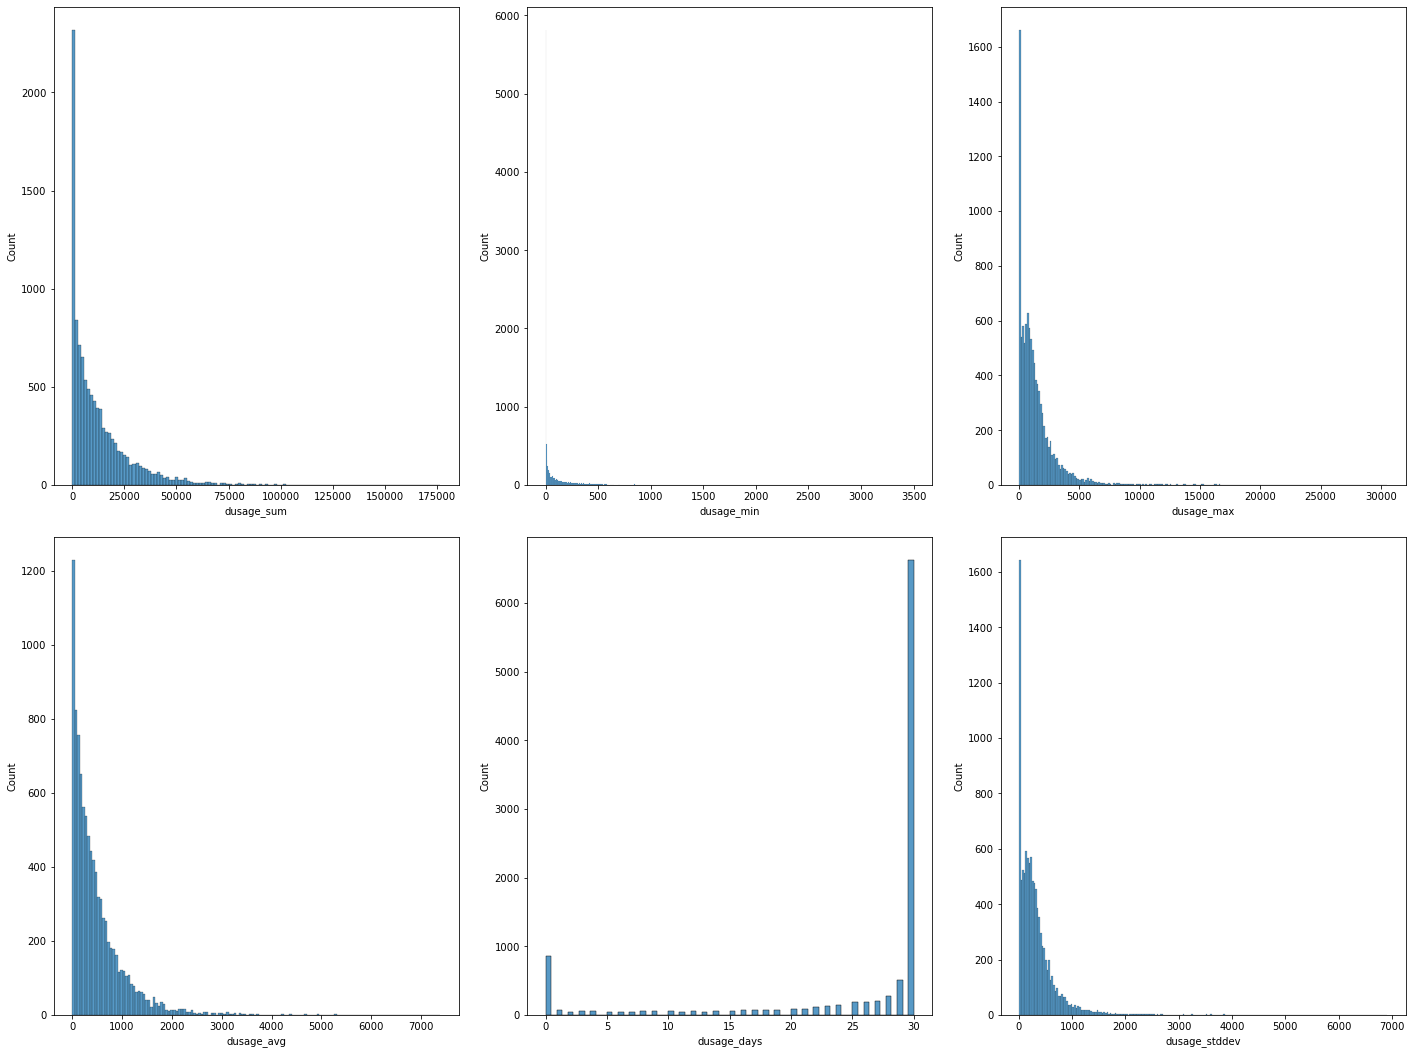

In [55]:
#dusage distribution plot
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Use the axes for plotting
sns.histplot(df_train_new['dusage_sum'], ax=axes[0,0]);
# axes[0,0].set_xlabel('Year')
# axes[0,0].set_ylabel('Yield (tons per hectare)')
# axes[0,0].legend(['Apples', 'Oranges']);
# axes[0,0].set_title('Crop Yields in Kanto')

# Pass the axes into seaborn
sns.histplot(df_train_new['dusage_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.histplot(df_train_new['dusage_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.histplot(df_train_new['dusage_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.histplot(df_train_new['dusage_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.histplot(df_train_new['dusage_stddev'], ax=axes[1,2]);

plt.tight_layout(pad=2);

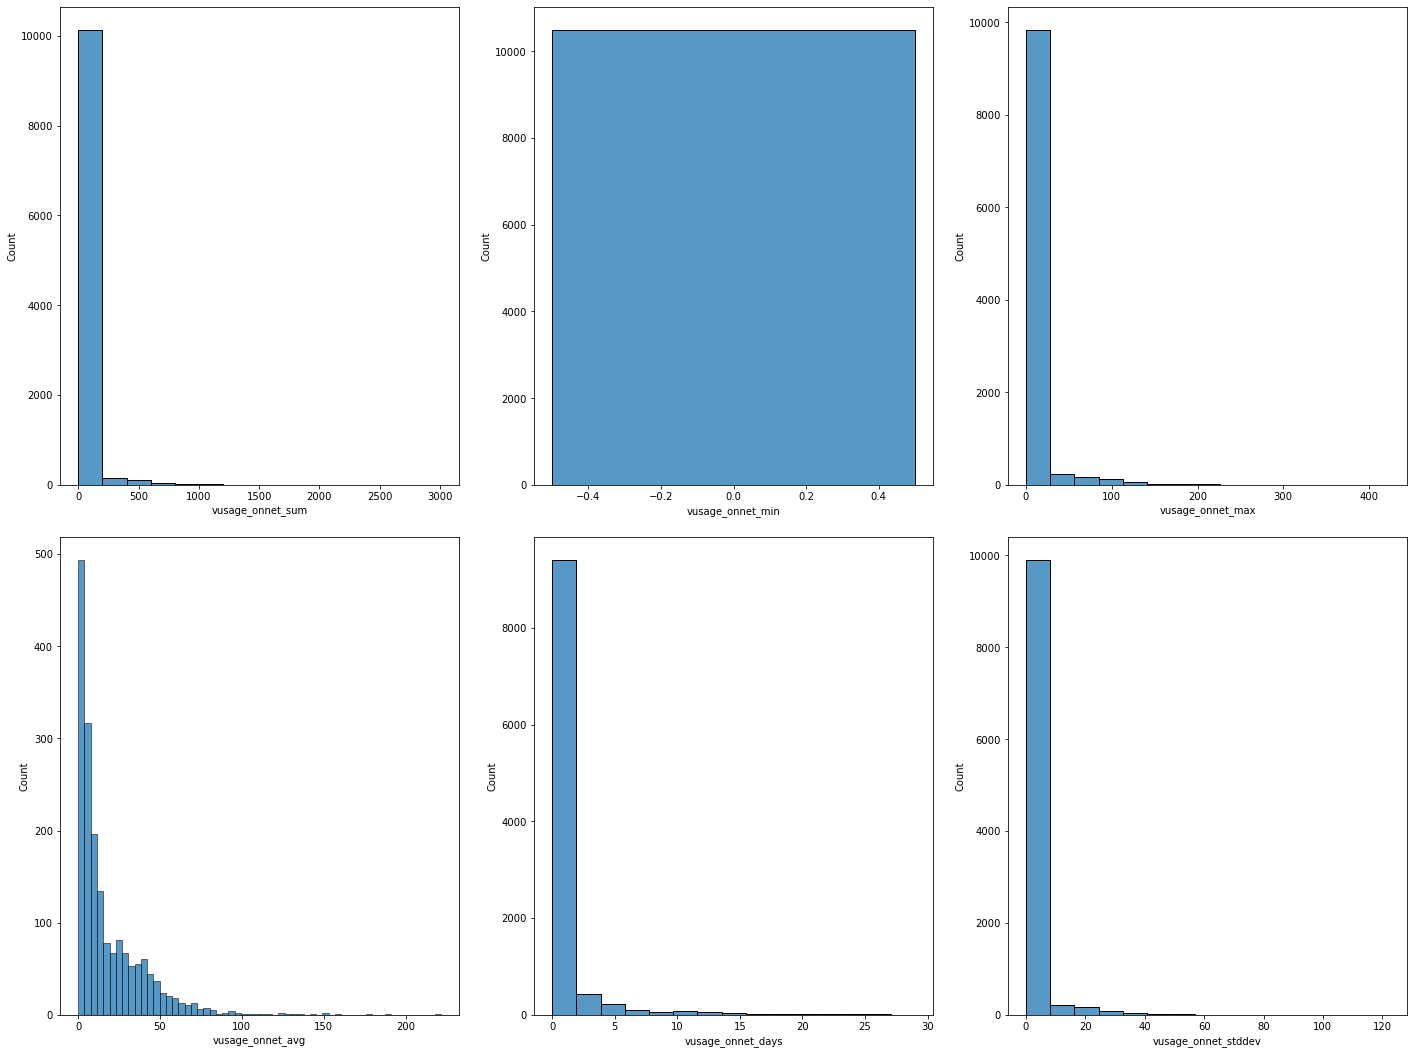

In [56]:
#vusage onnet distribution plot
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Use the axes for plotting
sns.histplot(df_train_new['vusage_onnet_sum'], ax=axes[0,0]);
# axes[0,0].set_xlabel('Year')
# axes[0,0].set_ylabel('Yield (tons per hectare)')
# axes[0,0].legend(['Apples', 'Oranges']);
# axes[0,0].set_title('Crop Yields in Kanto')

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_onnet_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.histplot(df_train_new['vusage_onnet_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_onnet_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_onnet_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_onnet_stddev'], ax=axes[1,2]);

plt.tight_layout(pad=2);

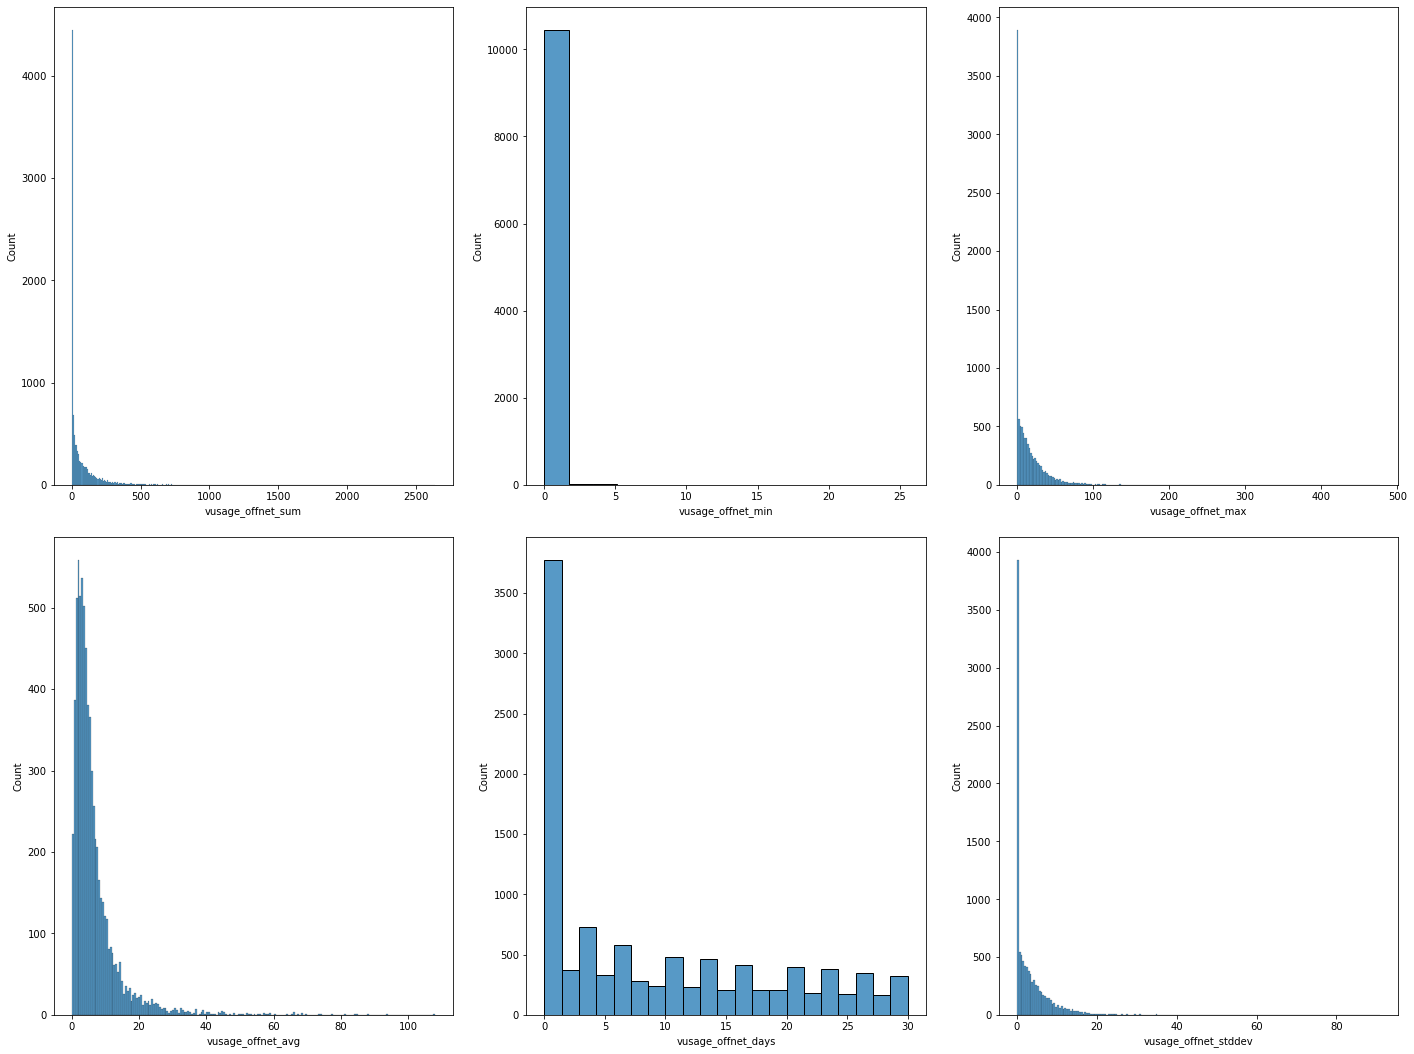

In [60]:
#vusage onnet distribution plot
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Use the axes for plotting
sns.histplot(df_train_new['vusage_offnet_sum'], ax=axes[0,0]);
# axes[0,0].set_xlabel('Year')
# axes[0,0].set_ylabel('Yield (tons per hectare)')
# axes[0,0].legend(['Apples', 'Oranges']);
# axes[0,0].set_title('Crop Yields in Kanto')

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_offnet_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.histplot(df_train_new['vusage_offnet_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_offnet_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_offnet_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.histplot(df_train_new['vusage_offnet_stddev'], ax=axes[1,2]);

plt.tight_layout(pad=2);

[]

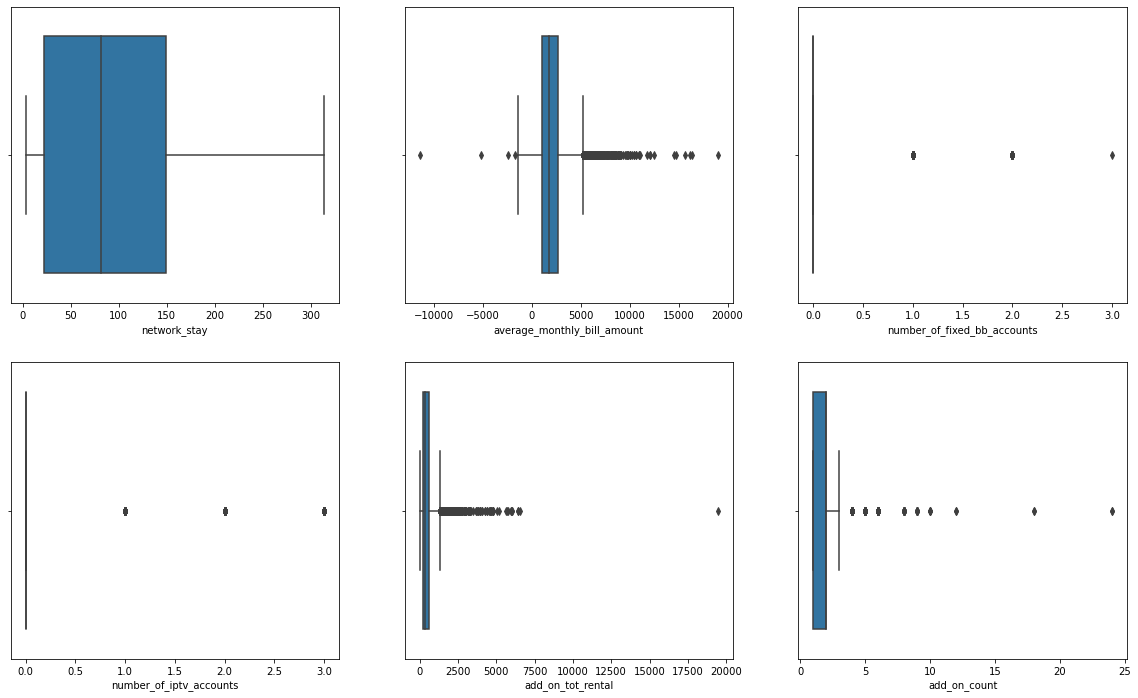

In [89]:
#box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Use the axes for plotting
sns.boxplot(x=df_train_new['network_stay'], ax=axes[0,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['average_monthly_bill_amount'], ax=axes[0,1]);

# Use the axes for plotting
sns.boxplot(x=df_train_new['number_of_fixed_bb_accounts'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['number_of_iptv_accounts'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['add_on_tot_rental'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['add_on_count'], ax=axes[1,2]);

plt.plot(pad=2);


[]

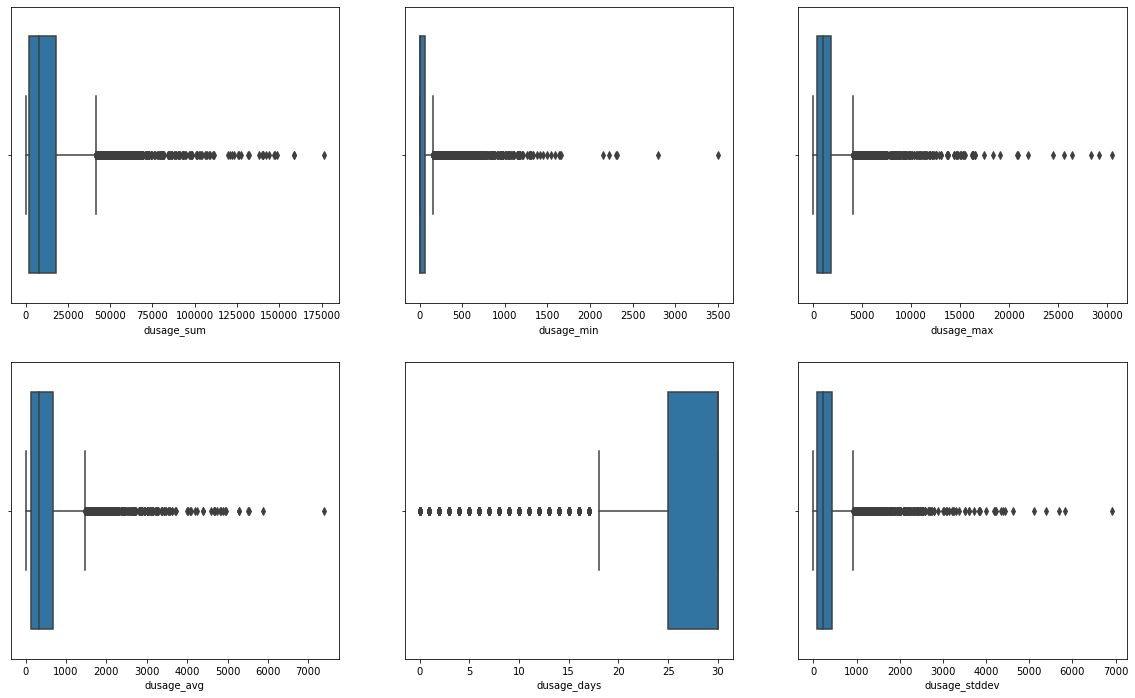

In [90]:
# dusage box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Use the axes for plotting
sns.boxplot(x=df_train_new['dusage_sum'], ax=axes[0,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['dusage_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.boxplot(x=df_train_new['dusage_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['dusage_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['dusage_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['dusage_stddev'], ax=axes[1,2]);

plt.plot(pad=2);


[]

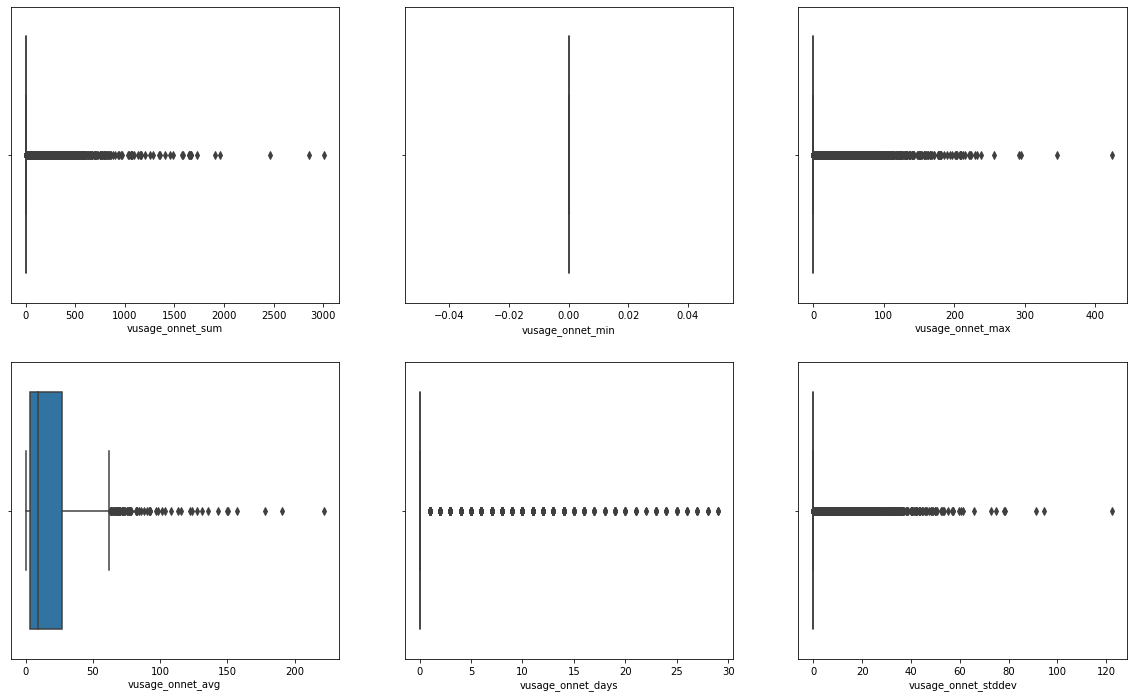

In [91]:
# vusage onnet box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Use the axes for plotting
sns.boxplot(x=df_train_new['vusage_onnet_sum'], ax=axes[0,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_onnet_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.boxplot(x=df_train_new['vusage_onnet_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_onnet_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_onnet_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_onnet_stddev'], ax=axes[1,2]);

plt.plot(pad=2);


[]

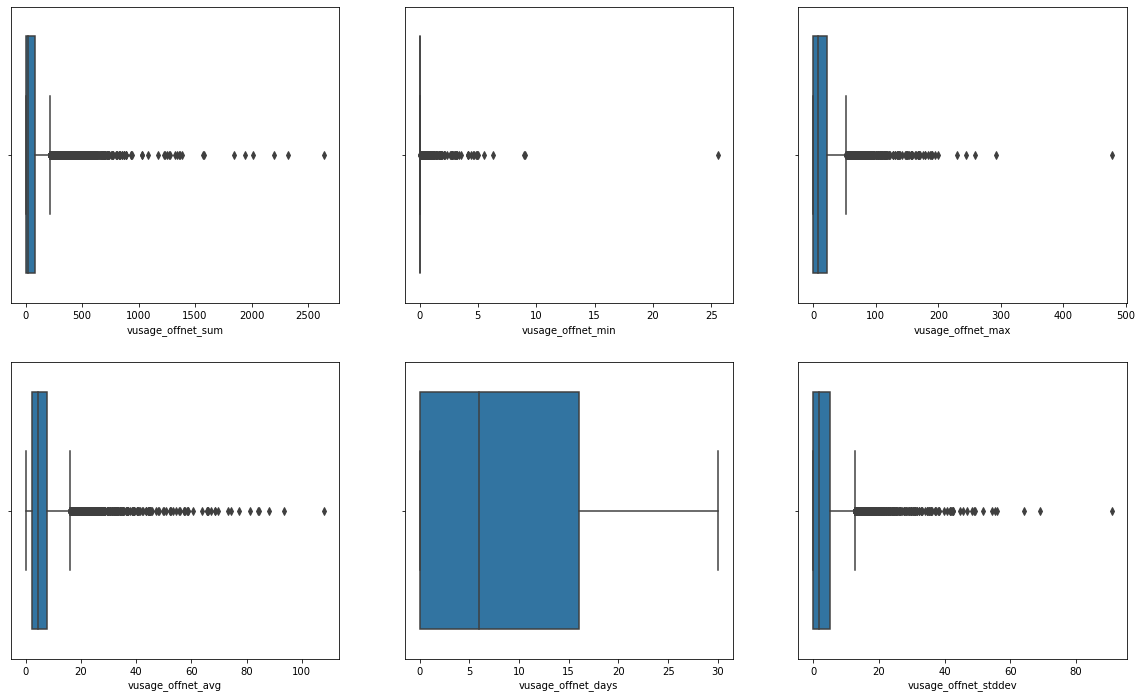

In [93]:
# vusage offnet box plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Use the axes for plotting
sns.boxplot(x=df_train_new['vusage_offnet_sum'], ax=axes[0,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_offnet_min'], ax=axes[0,1]);

# Use the axes for plotting
sns.boxplot(x=df_train_new['vusage_offnet_max'], ax=axes[0,2]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_offnet_avg'], ax=axes[1,0]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_offnet_days'], ax=axes[1,1]);

# Pass the axes into seaborn
sns.boxplot(x=df_train_new['vusage_offnet_stddev'], ax=axes[1,2]);

plt.plot(pad=2);


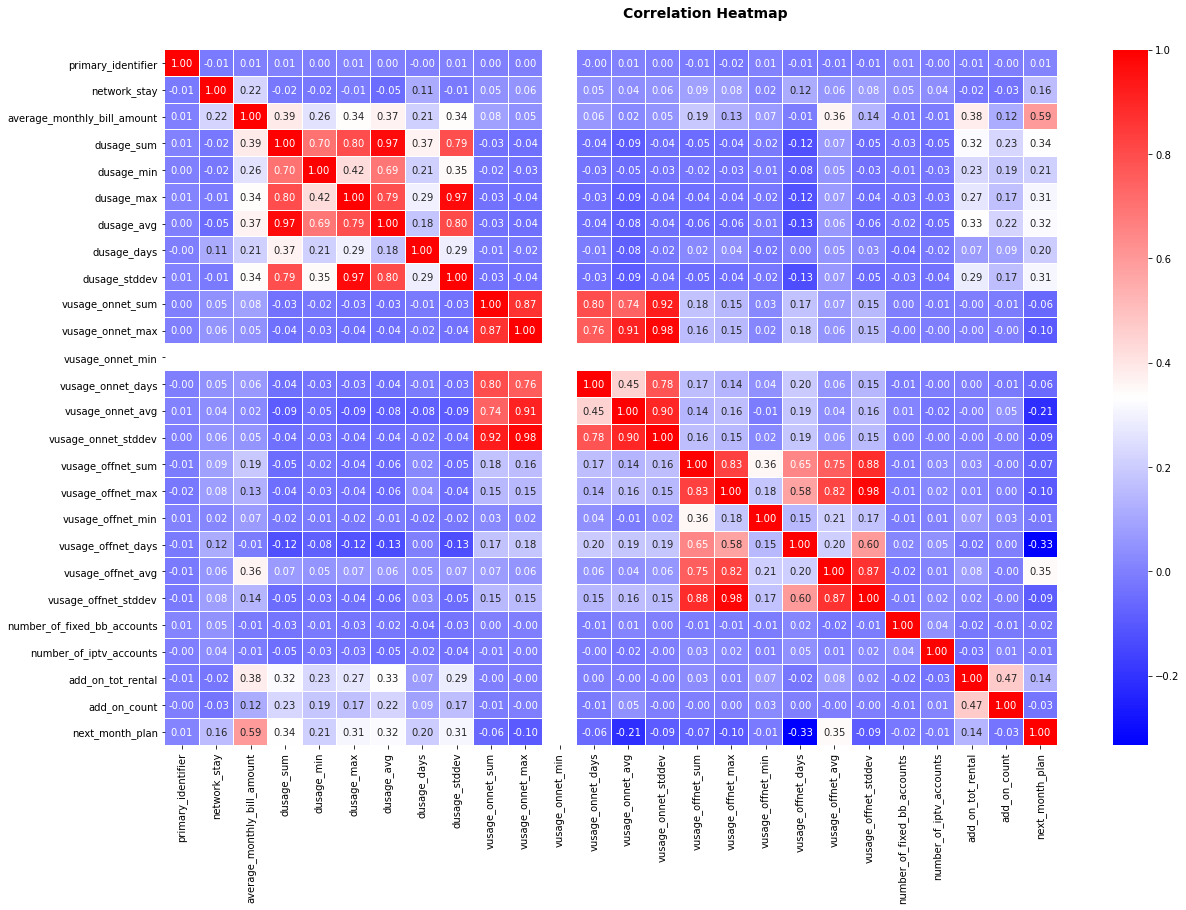

In [99]:
fig, (ax) = plt.subplots(1, 1, figsize=(20,12));
hm = sns.heatmap(df_train_new.corr(),
ax=ax,
cmap="bwr",
annot=True,
fmt='.2f',
linewidths=.05);
fig.subplots_adjust(top=0.93);
fig.suptitle('Correlation Heatmap', fontsize=14, fontweight='bold');
plt.savefig("output.png")

# Data Cleaning 